#Кейс "Ковчег"



##Подключение библиотек/чтение файла

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/ark.csv')

##Синий уровень

In [3]:
df

,Id,Age,Gender,Purchased
0,id1,<25,Male,No
1,id2,<25,Female,No
2,id3,<25,Female,Yes
3,id4,<25,Male,No
4,id5,25+,Male,No
...,...,...,...,...
79995,id79996,<25,Female,No
79996,id79997,<25,Male,No
79997,id79998,<25,Female,No
79998,id79999,<25,Female,No


In [4]:
#среднее в генеральной совокупности

gen_conv = ((df['Purchased']=='Yes').mean())*100

gen_conv

16.8175

In [5]:
#считаем выборку 10000 раз

sample_conversions = []
sample_size = 400

for _ in range(10000):
  df_sample = df.sample(n = sample_size)
  sample_conversion = (df_sample['Purchased']=='Yes').mean()
  sample_conversions.append(sample_conversion*100)

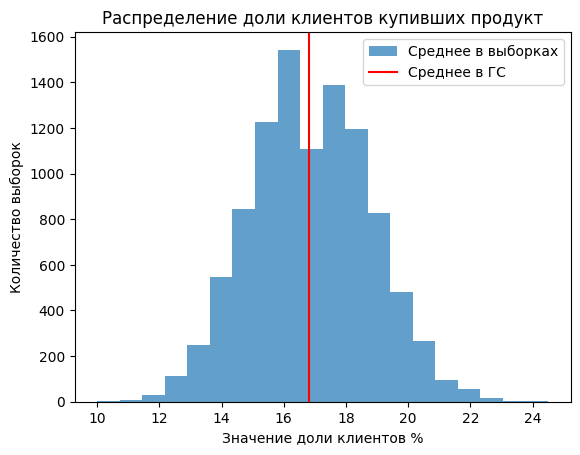

In [6]:
#строим график

plt.hist(sample_conversions,bins= 20, label = 'Среднее в выборках', alpha = .7)
plt.axvline(gen_conv, color = 'red', label = 'Среднее в ГС')
plt.title('Распределение доли клиентов купивших продукт')
plt.legend(loc = 'upper right')
plt.xlabel('Значение доли клиентов %')
plt.ylabel('Количество выборок')
plt.show()

##Красный уровень

In [7]:
#создаем 10000 выборок и сохраняем среднее значение для каждой

def stratified_sample(df, strata_col, frac):
    groups = df.groupby(strata_col)
    sample = pd.DataFrame()

    for _, group in groups:
        stratum_sample = group.sample(frac=frac, replace=False)
        sample = pd.concat([sample,stratum_sample])

    return sample




strat_sample_conversions = []
sample_size = 400

for _ in range(10000):
  df_sample = stratified_sample(df, ['Age','Gender'], sample_size / len(df))
  sample_conversion = (df_sample['Purchased']=='Yes').mean()
  strat_sample_conversions.append(sample_conversion)


In [8]:
strat_sample_conversions = list(map(lambda x: x*100, strat_sample_conversions))

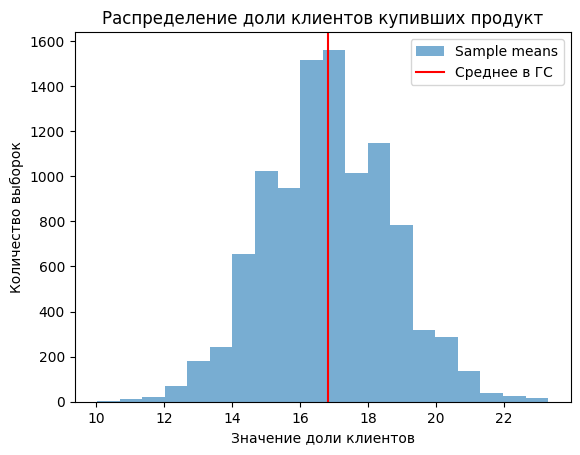

In [9]:

plt.hist(strat_sample_conversions,bins = 20, label = 'Sample means', alpha = .6)
plt.axvline(gen_conv, color = 'red', label = 'Среднее в ГС')
plt.title('Распределение доли клиентов купивших продукт')
plt.legend(loc = 'upper right')
plt.xlabel('Значение доли клиентов')
plt.ylabel('Количество выборок')
plt.show()

##Черный уровень

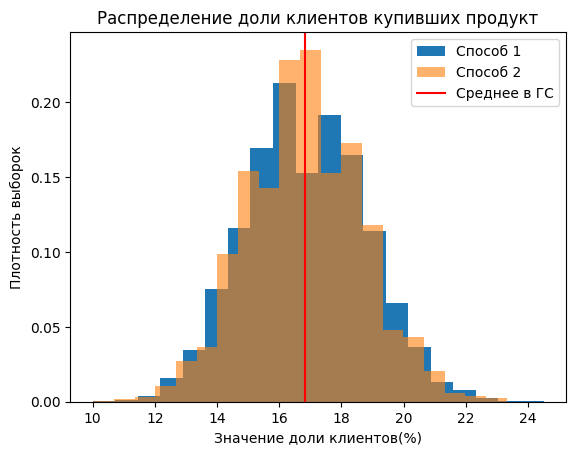

In [12]:

plt.hist(sample_conversions,bins= 20, label = 'Способ 1', density = True)


plt.hist(strat_sample_conversions,bins = 20, label = 'Способ 2', alpha = .6, density = True)

plt.axvline(gen_conv, color = 'red', label = 'Среднее в ГС')
plt.title('Распределение доли клиентов купивших продукт')
plt.legend(loc = 'best')
plt.xlabel('Значение доли клиентов(%)')
plt.ylabel('Плотность выборок')
plt.show()